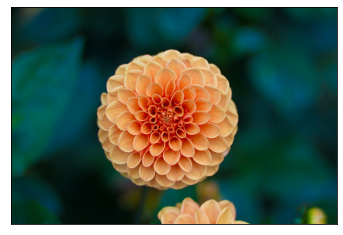

In [13]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [14]:
china.shape

(427, 640, 3)

In [15]:
#reshape the data into [n*samples x n*features] and rescale the color so that they lie between 0 and 1
data = china/ 255.0 #use 0..1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [16]:
#visulaize these pixels in this color space using a subset of 10,000 pixels for efficiency
def plot_pixels(data, title, colors=None, N =10000):
    if colors is None:
        colors = data
        
    #choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
 
    ax[1].scatter(R, G, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

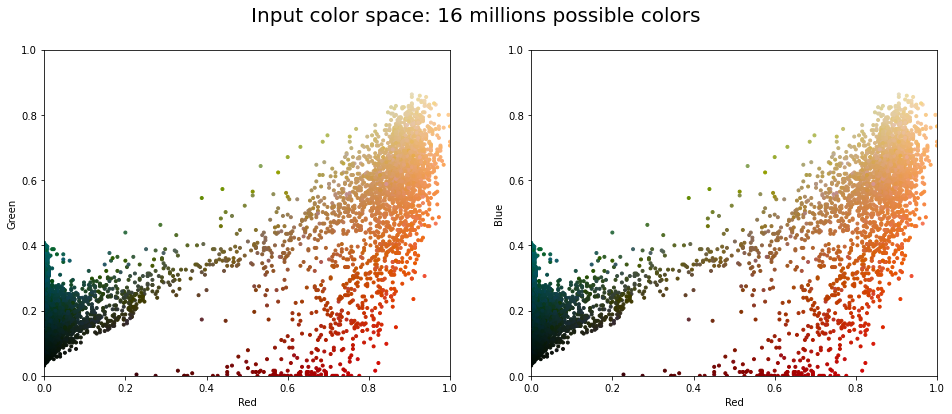

In [18]:
plot_pixels(data, title='Input color space: 16 millions possible colors')

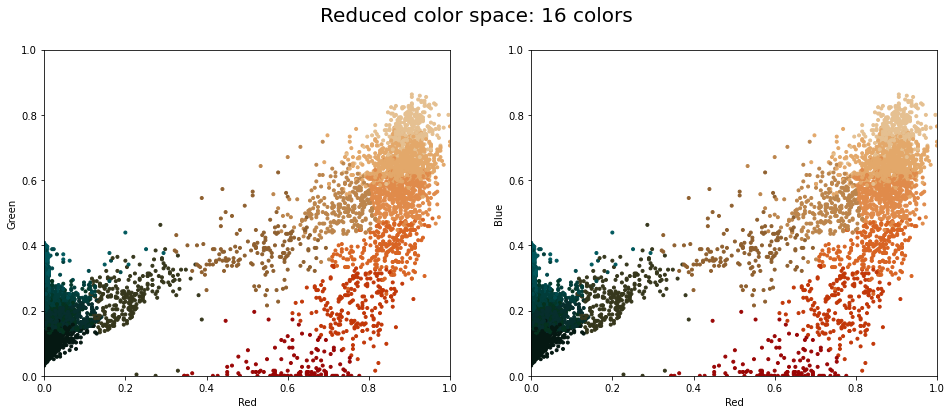

In [22]:
import warnings; warnings.simplefilter('ignore') #fix numpy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')


Text(0.5, 1.0, '16 color Image')

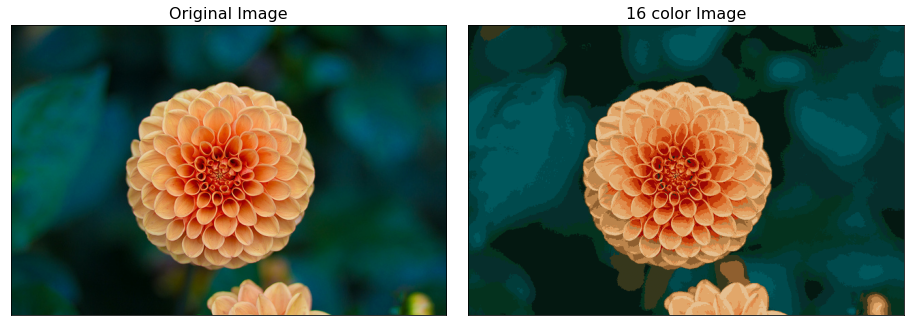

In [24]:
china_recolored = new_colors.reshape(china.shape)

fig, ax= plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16 color Image', size=16)